<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Разделение-данных-на-выборки" data-toc-modified-id="Разделение-данных-на-выборки-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Разделение данных на выборки</a></span></li><li><span><a href="#Масштабирование-признаков" data-toc-modified-id="Масштабирование-признаков-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Масштабирование признаков</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Определение-точности-на-разных-моделях" data-toc-modified-id="Определение-точности-на-разных-моделях-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Определение точности на разных моделях</a></span></li><li><span><a href="#Проверка-модели-на-баланс-классов" data-toc-modified-id="Проверка-модели-на-баланс-классов-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Проверка модели на баланс классов</a></span></li><li><span><a href="#Проверка-на-константной-модели" data-toc-modified-id="Проверка-на-константной-модели-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Проверка на константной модели</a></span></li><li><span><a href="#Определение-матрицы-ошибок-разных-моделей" data-toc-modified-id="Определение-матрицы-ошибок-разных-моделей-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Определение матрицы ошибок разных моделей</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Улучшение-модели" data-toc-modified-id="Улучшение-модели-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Улучшение модели</a></span></li><li><span><a href="#Проверка-модели-на-адекватность" data-toc-modified-id="Проверка-модели-на-адекватность-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Проверка модели на адекватность</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Подготовка данных

In [2]:
# Импортируем все необходимые библиотеки 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, f1_score, recall_score, precision_score, confusion_matrix
from joblib import dump 
from tqdm import tqdm

In [3]:
# Выгрузим данные и изучим признаки
try:
    df = pd.read_csv('/datasets/Churn.csv')
except:
    df = pd.read_csv('Churn.csv')
    
# Вывод первых и последних пяти строк таблиц датафрейма
display(df.sample)

# Вывод информации о типах данных в таблицах
df.info()

df.describe()

<bound method NDFrame.sample of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfP

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


array([[<AxesSubplot:title={'center':'RowNumber'}>,
        <AxesSubplot:title={'center':'CustomerId'}>,
        <AxesSubplot:title={'center':'CreditScore'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Tenure'}>,
        <AxesSubplot:title={'center':'Balance'}>],
       [<AxesSubplot:title={'center':'NumOfProducts'}>,
        <AxesSubplot:title={'center':'HasCrCard'}>,
        <AxesSubplot:title={'center':'IsActiveMember'}>],
       [<AxesSubplot:title={'center':'EstimatedSalary'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

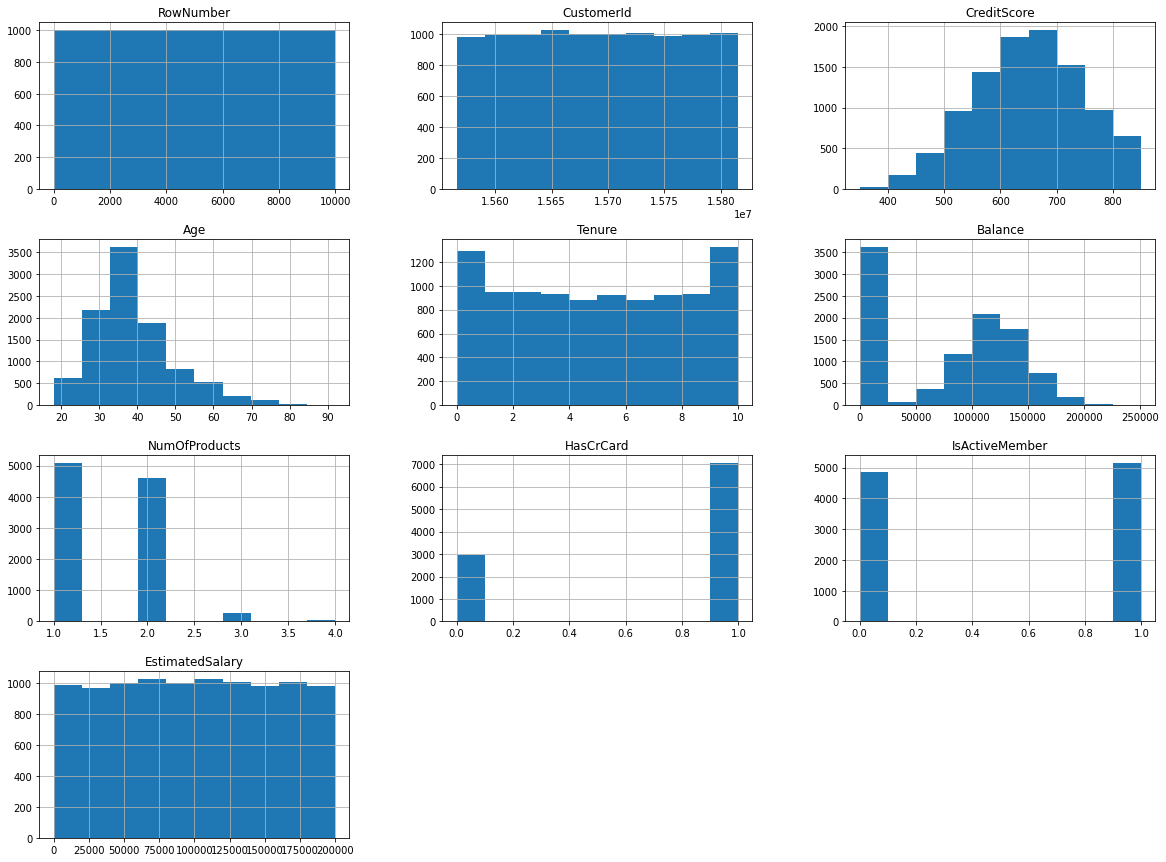

In [69]:
df[['RowNumber', 
    'CustomerId', 
    'CreditScore',
    'Age', 
    'Tenure', 
    'Balance', 
    'NumOfProducts', 
    'HasCrCard', 
    'IsActiveMember', 
    'EstimatedSalary']].hist(figsize=(20, 15))

<AxesSubplot:xlabel='Geography'>

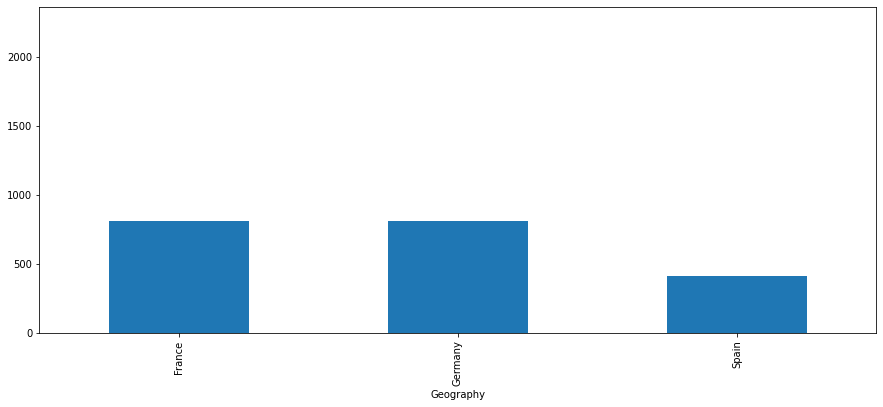

In [70]:
df.groupby('Age')['Exited'].sum().plot(figsize=(15,6),kind='bar')
df.groupby('Tenure')['Exited'].sum().plot(figsize=(15,6),kind='bar')

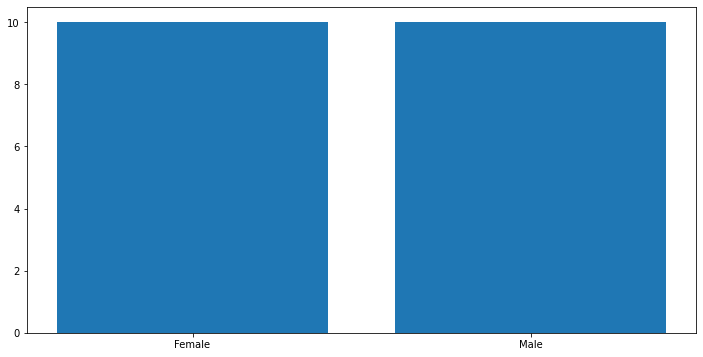

In [62]:

x = df['Gender']
y = df['Tenure']
fig, ax = plt.subplots()

ax.bar(x, y)

fig.set_figwidth(12)
fig.set_figheight(6)  

plt.show()

In [16]:
# Выведем количество пропущенных значений
df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [17]:
# Выведем количество дубликатов в датафрейме
df.duplicated().sum()

0

В датафрейме есть пропуски в признаке Tenure (сколько лет человек является клиентом банка), скорее всего это новые клиенты, которые недавно начали сотрудничать с банком, поэтому пропуски можно заполнить нулями. Также необходимо преобразовать категориальные признаки в целочисленные и избаваться от таблиц, не имеющие ценность для обучения. Произведем замены выведем интересующие нас таблицы:

In [18]:
# Заполняем пустые значения нулями
df['Tenure'] = df['Tenure'].fillna(0)

# Проверяем датафрейм на количество пропущенных значений
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [19]:
# Вывод количества уникальных значений  
print(df['CustomerId'].nunique())
print(df['Surname'].nunique(),'\n')

# Вывод уникальных значений столбцов
print(df['Geography'].unique())
print(df['Gender'].unique())
print(df['Age'].unique())
print(df['Exited'].unique())


10000
2932 

['France' 'Spain' 'Germany']
['Female' 'Male']
[42 41 39 43 44 50 29 27 31 24 34 25 35 45 58 32 38 46 36 33 40 51 61 49
 37 19 66 56 26 21 55 75 22 30 28 65 48 52 57 73 47 54 72 20 67 79 62 53
 80 59 68 23 60 70 63 64 18 82 69 74 71 76 77 88 85 84 78 81 92 83]
[1 0]


Избавимся от таблиц, которые мало влияют на обучение модели, так:
1) таблица RowNumber, по своему предназначению показывает номер столбца и не несет ценности для обучения модели, поэтому от него можно избавиться.

2) таблица CustomerId показывает идентификатор клиента, имеет много уникальных значений, что сильно усложняет задачу при обучении модели, поэтому стоблец можно удалить.

3) таблица Surname показывает фамилию пользователя, также содержит много уникальных значений, что сильно усложняет задачу и не несет ценности для качества будущей модели, поэтому столбец также можно удалить.

4) таблица CreditScore показывает кредитный рейтинг каждого пользователя, этот показатель важен при обучении модели

5) таблица Geography имеет всего 3 уникальных значения стран France', 'Spain', 'Germany' можно выполнить преобразование OHE 

6) таблица Gender, Age и Exited можно преобразовать с помощью прямого кодирования OHE.

7) таблицы Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary не требуют дополнительных преобразований и необходимы при обучении модели

In [20]:
# Удаляем не нужные признаки и сохраняем их в отдельный датафрейм
df_ml = df.drop(['RowNumber','CustomerId', 'Surname'], axis=1)

# Выведем новый датафрейм
df_ml

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


**Вывод:** данные обработаны, теперь их можно разбевать на выборки

### Разделение данных на выборки

In [21]:
# Произведем прямое кодирование df_ml, с использованием drop_first, чтобы не попасть в дамми ловушку 
df_ml = pd.get_dummies(df_ml, drop_first=True)
print(df_ml)

      CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42     2.0       0.00              1          1   
1             608   41     1.0   83807.86              1          0   
2             502   42     8.0  159660.80              3          1   
3             699   39     1.0       0.00              2          0   
4             850   43     2.0  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39     5.0       0.00              2          1   
9996          516   35    10.0   57369.61              1          1   
9997          709   36     7.0       0.00              1          0   
9998          772   42     3.0   75075.31              2          1   
9999          792   28     0.0  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Exited  Geography_Germany  \
0                  1        101348.88       1                  0   
1          

In [22]:
# Разделим исходные данные на тренировочную и вадидационную выборки 
train, test = train_test_split(df_ml, test_size=0.2, random_state=123145)

# Теперь разделим тренировачные данные и отдадим 20 процентов валидационной выборке
train, valid = train_test_split(train, test_size=0.2, random_state=123145)

# Создадим переменные для признаков и целевого признака тестовой выборки
features_test = test.drop(['Exited'], axis=1)
target_test = test['Exited']

# Создадим переменные для признаков и целевого признака тренеровочной выборки
features_train = train.drop(['Exited'], axis=1)
target_train = train['Exited']

# Создадим переменные для признаков и целевого признака валидационной выборки: 
features_valid = valid.drop(['Exited'], axis=1)
target_valid = valid['Exited']


print(features_test.shape)
print(target_test.shape)

print(features_train.shape)
print(target_train.shape)

print(features_valid.shape)
print(target_valid.shape)

(2000, 11)
(2000,)
(6400, 11)
(6400,)
(1600, 11)
(1600,)


Приведем признаки к одному масштабу, то есть стандартизируем их.

### Масштабирование признаков

In [23]:
# Зафиксируем численные признаки
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

#Создаем объект scaler и настраеваем его на обучающих данных:
scaler = StandardScaler()
scaler.fit(features_train[numeric])

# Стандантизируем тренеровачную, валидационную и тестевую выборки
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

# Выведем полученный результат тренировочной выборки
print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
5153     0.455387 -0.942999  1.449275 -1.231010       0.838464          1   
7168    -1.486220 -0.565534  0.805265 -1.231010       0.838464          1   
8936    -0.866558  1.416157  1.449275  0.314179      -0.906632          0   
7336     0.031951 -1.037365  0.805265 -1.231010       0.838464          1   
9114    -1.135078 -0.282435  0.161254 -1.231010       0.838464          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
5153               0         0.210203                  0                0   
7168               1        -0.242946                  0                0   
8936               0        -0.821210                  0                0   
7336               0         0.898923                  0                0   
9114               0         0.439431                  0                0   

      Gender_Male  
5153            0  
7168            1  
8936          

**Вывод:** В результате масштабированния получены признаки для трех выборок.

## Исследование задачи

### Определение точности на разных моделях

Проверим данные на трех моделях:

In [24]:
# Создадим функцию из трех моделей и проверим результаты
def models(f_tr, t_tr, f_v, t_v):
    model_dtc = DecisionTreeClassifier(random_state=123145)
    dtc = model_dtc.fit(f_tr, t_tr).score(f_v, t_v)
    
    model_rfc = RandomForestClassifier(random_state=123145, n_estimators=100)
    rfc = model_rfc.fit(f_tr, t_tr).score(f_v, t_v)
    
    model_lr = LogisticRegression(solver = 'lbfgs')
    lr = model_lr.fit(f_tr, t_tr).score(f_v, t_v)
    print('Значения accuracy:')
    print('Дерево решений:', dtc, 'cлучайный лес:', rfc, 'логистическая регрессия:', lr)

In [25]:
models(features_train, target_train, features_valid, target_valid)

Значения accuracy:
Дерево решений: 0.805625 cлучайный лес: 0.86625 логистическая регрессия: 0.825


**Вывод:** доля правильных ответов составляет больше 80 %, что говорит о хорошем результате, но необходимо проверить данные на дисбаланс классов.

### Проверка модели на баланс классов

Изучим баланс классов в датафрейме

Соотношение классов:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


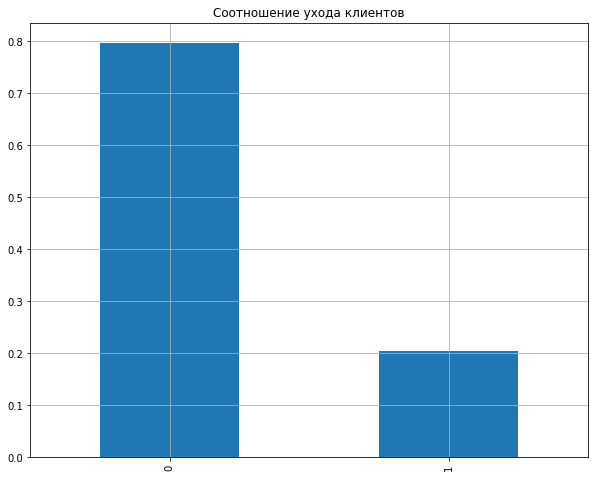

In [26]:
print('Соотношение классов:')
print(df_ml['Exited'].value_counts(normalize=1))
df['Exited'].value_counts(normalize=1).plot(kind='bar', grid=True, figsize=(10,8), title = 'Соотношение ухода клиентов');

**Вывод:** Наблюдается заметный дисбаланс класов 0 ≈ 80% и 1 ≈ 20%, то есть 1 к 4.
Можно предположить, что результаты предсказаний моделей будут сильно склоняться к одному варианту ответов.

Проанализируем частоты классов в результатах предсказаний на трех моделей: 

Соотношение классов:
0    0.78875
1    0.21125
dtype: float64


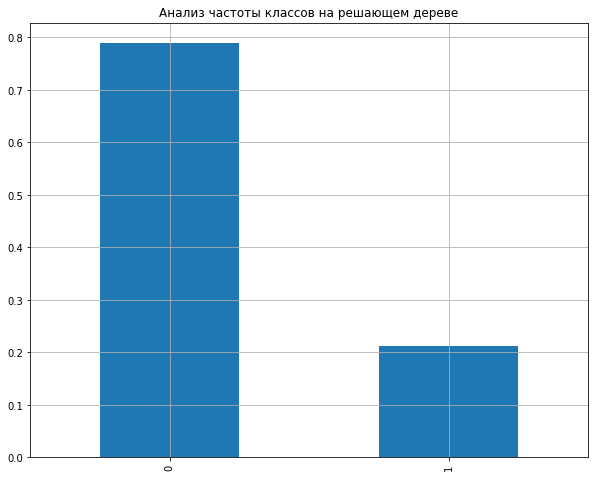

In [27]:
# Анализ частоты классов в результатах предсказаний на решающем дереве
model_dtc = DecisionTreeClassifier(random_state=123145)
model_dtc.fit(features_train, target_train)
predicted_valid = pd.Series(model_dtc.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=1)
print('Соотношение классов:')
print(class_frequency)
class_frequency.plot(kind='bar', grid=True, figsize=(10,8), title = 'Анализ частоты классов на решающем дереве');

Соотношение классов:
0    0.873125
1    0.126875
dtype: float64


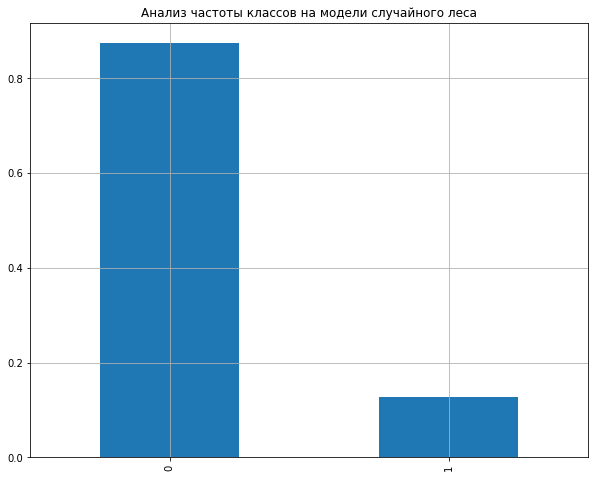

In [28]:
model_rfc = RandomForestClassifier(random_state=123145, n_estimators=100)
model_rfc.fit(features_train, target_train)
predicted_valid = pd.Series(model_rfc.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=1)
print('Соотношение классов:')
print(class_frequency)
class_frequency.plot(kind='bar', grid=True, figsize=(10,8), title = 'Анализ частоты классов на модели случайного леса');

Соотношение классов:
0    0.933125
1    0.066875
dtype: float64


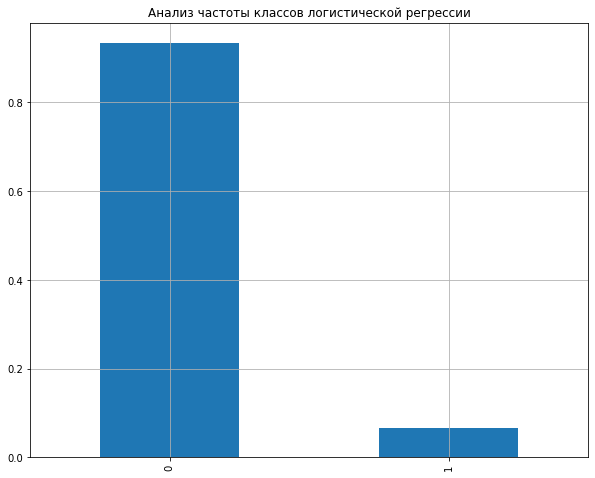

In [29]:
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(features_train, target_train)
predicted_valid = pd.Series(model_lr.predict(features_valid))
class_frequency = predicted_valid.value_counts(normalize=1)
print('Соотношение классов:')
print(class_frequency)
class_frequency.plot(kind='bar', grid=True, figsize=(10,8), title = 'Анализ частоты классов логистической регрессии');

**Вывод:** Из всех моделей логистичесая регрессия показала самую высокую точность, но данная модель выдает в большей степени одинаковый результат = 0.

### Проверка на константной модели

Создадим константную модель, которая любому объекту сможет спрогнозировать класс 0.

In [30]:
target_pred_constant = pd.Series(0, index=target_train.index)
print(accuracy_score(target_train, target_pred_constant))

0.7965625


**Вывод:** более 80 % константная модель будет прогнозировать любому объекту класс 0.

### Определение матрицы ошибок разных моделей

Определим матрицу ошибок:

In [31]:
# Матрица ошибок дерева решений
model_dtc = DecisionTreeClassifier(random_state=123145)
model_dtc.fit(features_train, target_train)
predicted_valid_dtc = model_dtc.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid_dtc))

[[1123  172]
 [ 139  166]]


**Вывод:** Модель дерева решений показывает хорошую долю позитивных (TP=166) и негативных (FN=139) предсказаний, то есть выдает заметно больше качественных предсказаний, но при этом больше всего склоняется к ложно позитивным предсказаниям (FP=172)

In [32]:
# Создадим функцию которая будет подсчитывать значения recall_score, precision_score, f1_score
def metrics(target_valid, predicted_valid):
    print('Полнота:', recall_score(target_valid, predicted_valid))
    print('Точность:', precision_score(target_valid, predicted_valid))
    print('F1-мера:', f1_score(target_valid, predicted_valid))

In [33]:
# Полнота, точность, и F1-мера модели дерева решений
metrics(target_valid, predicted_valid_dtc)

Полнота: 0.5442622950819672
Точность: 0.4911242603550296
F1-мера: 0.516329704510109


**Вывод:** Модель дерева решений показала низкие результаты по полноте, точности из-за чего наблюдается низкое значение F1-меры.

In [34]:
# Матрица ошибок случайного леса
model_rfc = RandomForestClassifier(n_estimators=100, random_state=123145)
model_rfc.fit(features_train, target_train)
predicted_valid_rfc = model_rfc.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid_rfc))

[[1239   56]
 [ 158  147]]


**Вывод:** Модель случайного леса склоняется к ложнонегативным ответам (FN=158), при этом имеет неплохую  долю позитивных ответов (TP=147). Качественные предсказания у этой модели намного ниже, чем у дерева решений. 

In [35]:
# Полнота, точность, и F1-мера модели случайного леса
metrics(target_valid, predicted_valid_rfc)

Полнота: 0.4819672131147541
Точность: 0.7241379310344828
F1-мера: 0.5787401574803149


**Вывод:** Модель случайного леса показала низкие результаты по полноте, но при этом высокие значения в точности из-за чего значение F1-меры имеет неплохие показатели, но все же далеки от идеала.

In [36]:
# Матрица ошибок логистической регрессии 
model_lr = LogisticRegression(solver='lbfgs')
model_lr.fit(features_train, target_train)
predicted_valid_lr = model_lr.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid_lr))

[[1254   41]
 [ 239   66]]


**Вывод:**  Модель случайного леса склоняется к ложнонегативным ответам (FN=239), при этом имеет низкую долю позитивных ответов (TP=66). Качественные предсказания у этой модели самые низкие, чем у дерева решений и модели случайного леса.

In [37]:
# Полнота, точность, и F1-мера модели логистической регрессии 
metrics(target_valid, predicted_valid_lr)

Полнота: 0.21639344262295082
Точность: 0.616822429906542
F1-мера: 0.32038834951456313


**Вывод:** Модель логистической регрессии имеет самые низкие результаты по полноте и неплохие значения в точности, но при этом значение F1-меры имеет низкие показатели. Попробуем сбалансировать классы в логистической регрессии.

In [38]:
model_lr = LogisticRegression(solver='lbfgs', class_weight='balanced')
model_lr.fit(features_train, target_train)
predicted_valid_lr2 = model_lr.predict(features_valid)

print(confusion_matrix(target_valid, predicted_valid_lr2))

[[914 381]
 [ 96 209]]


**Вывод:** Модель логистической регрессии после взвешивания классов стала склоняется к ложнопозитивным ответам (FP=381), при этом улучшилась доля позитивных ответов (с TP=66, до TP=209) и уменьшилась доля ложнонегативных ответов (c FN=239 до FN=96). 

In [39]:
# Полнота, точность, и F1-мера модели логистической регрессии 
metrics(target_valid, predicted_valid_lr2)

Полнота: 0.6852459016393443
Точность: 0.35423728813559324
F1-мера: 0.46703910614525146


**Вывод:** После взвешивания классов улучшились покозатели полноты и вполовину упала точность, показатель F1-меры улучшился, но при этом все еще далеки до нужного результата  

## Борьба с дисбалансом

Так как в начальной выборке соотношение классов 0 ≈ 80% и 1 ≈ 20%, то необходмо увеличить количество наименьших ответов в 4 раза для достижения баланса.

In [40]:
# Создание функции по увеличения выборки  
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=123145)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

In [71]:
# Проверка сбалансированной выборки на модели дерева решений
model_dtc = DecisionTreeClassifier(random_state=123145, max_depth)
model_dtc.fit(features_upsampled, target_upsampled)
predicted_valid_dtc = model_dtc.predict(features_valid)
print("F1-мера дерева решений:", f1_score(target_valid, predicted_valid_dtc))

F1-мера дерева решений: 0.4728434504792332


In [72]:
# Проверка сбалансированной выборки на модели случайного леса
model_rfc = RandomForestClassifier(n_estimators=100, random_state=123145)
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid_rfc = model_rfc.predict(features_valid)
print("F1-мера случайного леса:", f1_score(target_valid, predicted_valid_rfc))

F1-мера случайного леса: 0.6202090592334495


In [73]:
# Проверка сбалансированной выборки на модели логистической регрессии
model_lr = LogisticRegression(solver='lbfgs', random_state=123145, class_weight='balanced')
model_lr.fit(features_upsampled, target_upsampled) 
predicted_valid_lr = model_lr.predict(features_valid)

print("F1-мера логистической регрессии:", f1_score(target_valid, predicted_valid_lr))

F1-мера логистической регрессии: 0.46703910614525146


**Вывод:** Лучшее значение F1-меры после увеличения выборки показала модель случайного леса, её и будем использовать на финальном тестирование модели.

### Улучшение модели

In [90]:
%%time
frst = RandomForestClassifier(class_weight = 'balanced', random_state = 123145) 
frst_params = {'n_estimators': range(10, 30, 10),
               'max_depth': range(2, 10, 2)} 
gs = GridSearchCV(frst, frst_params, cv=3, scoring='f1', verbose=True).fit(features_upsampled, target_upsampled) 
print('F1-мера:', gs.best_score_) 
print('Оптимальные параметры модели:', gs.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
F1-мера: 0.8182213332628078
Оптимальные параметры модели: {'max_depth': 8, 'n_estimators': 20}
CPU times: user 2.09 s, sys: 3.96 ms, total: 2.09 s
Wall time: 2.1 s


In [103]:
# Проверка сбалансированной выборки на модели случайного леса
model_rfc = RandomForestClassifier(n_estimators=20, max_depth=8, class_weight = 'balanced', random_state=123145)
model_rfc.fit(features_upsampled, target_upsampled)
predicted_valid_rfc = model_rfc.predict(features_valid)
print("F1-мера случайного леса:", f1_score(target_valid, predicted_valid_rfc))

F1-мера случайного леса: 0.613728129205922


In [94]:
# Проверим точность модели на сбалансированной выборке
models(features_upsampled, target_upsampled, features_valid, target_valid)

Значения accuracy:
Дерево решений: 0.79375 cлучайный лес: 0.86375 логистическая регрессия: 0.6975


**Вывод:** показатели точности снизились у дерева решений (с 0.8 до 0.79) и логистической регрессии( с 0.82 до 0.69), а показатели случайного леса увеличелись (с 0.86625 до 0.86375). 

### Проверка модели на адекватность 

Сравним показатели лучшей модели с значениями константантной модели, а также AUC-ROC, так как константная подель содержит только негативные ответы.

In [45]:
# Создаем константную модель
target_pred_constant = pd.Series(0, index=target_valid.index)

In [46]:
#Сравним показатель точности (accuracy_score) константной модели и финальной модели
print('accuracy_score константой модели:', accuracy_score(target_valid, target_pred_constant))
print('accuracy_score финальной модели:', accuracy_score(target_valid, predicted_valid_rfc))

# сравним AUC-ROC
print('AUC-ROC константой модели:', roc_auc_score(target_valid, target_pred_constant))
print('AUC-ROC финальной модели:', roc_auc_score(target_valid, predicted_valid_rfc))

accuracy_score константой модели: 0.809375
accuracy_score финальной модели: 0.86375
AUC-ROC константой модели: 0.5
AUC-ROC финальной модели: 0.7566681435533894


**Вывод:** Финальная модель показывает лучше результаты, чем константная модель, поэтому её можно считать адекватной.

## Тестирование модели

Протестируем лучшую модель на тестовой выборке

In [93]:
# Тестирование модели случайного леса на тестовой выборке
predicted_valid_rfc = model_rfc.predict(features_test)
metrics(target_test, predicted_valid_rfc)

Полнота: 0.713953488372093
Точность: 0.5531531531531532
F1-мера: 0.6233502538071066


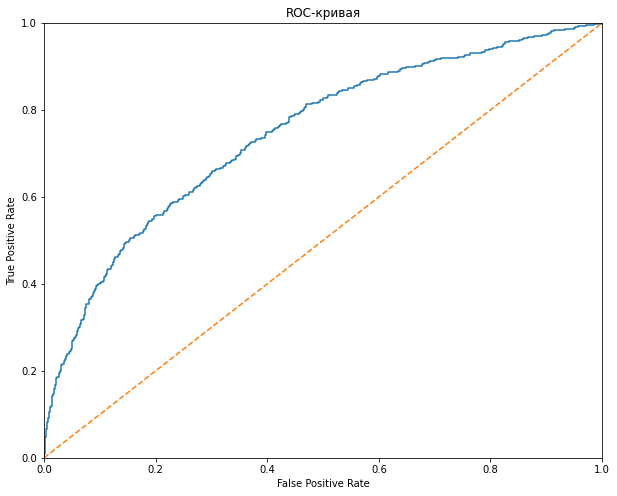

In [48]:
probabilities_test_lr = model_lr.predict_proba(features_test)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_test_lr[:, 1]) 

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

**Вывод:** Финальная достигла порога метрики (F1 > 0.59) и показывает адекватные результаты. При этом модель имеет не высокий  показатель полноты = 0.57, зато показатель точности имеет высокое значение= 0.71, модель будет верно предсказывать большую часть ухода клиентов.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [X]  Весь код выполняется без ошибок
- [X]  Ячейки с кодом расположены в порядке исполнения
- [X]  Выполнен шаг 1: данные подготовлены
- [X]  Выполнен шаг 2: задача исследована
    - [X]  Исследован баланс классов
    - [X]  Изучены модели без учёта дисбаланса
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 3: учтён дисбаланс
    - [X]  Применено несколько способов борьбы с дисбалансом
    - [X]  Написаны выводы по результатам исследования
- [X]  Выполнен шаг 4: проведено тестирование
- [X]  Удалось достичь *F1*-меры не менее 0.59
- [X]  Исследована метрика *AUC-ROC*